In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
gvt_spnd = pd.read_csv("government_health_spending_per_person_international_dollar.csv")
#average health expenditure per person in dollars

In [3]:
gvt_spnd.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24,2.03,2.51,4.11,4.27,4.91,4.5,5.28,5.18
1,Albania,52.9,57.8,61.2,72.7,97.5,96.2,107.0,109.00,117.00,151.00,164.00,178.00,189.00,221.0,244.00,225.00
2,Algeria,145.0,140.0,146.0,152.0,148.0,138.0,164.0,174.00,185.00,161.00,160.00,173.00,211.00,238.0,289.00,257.00
3,Andorra,947.0,1040.0,1180.0,1670.0,1210.0,1280.0,1340.0,1480.00,1530.00,1610.00,1710.00,2010.00,2110.00,2250.0,2390.00,2280.00
4,Angola,59.5,33.1,37.5,30.4,32.9,44.6,70.3,50.00,58.40,47.90,53.10,82.70,105.00,161.0,267.00,139.00


In [4]:
gvt_spnd.shape

(190, 17)

In [5]:
gvt_spnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
country    190 non-null object
1995       187 non-null float64
1996       188 non-null float64
1997       188 non-null float64
1998       189 non-null float64
1999       189 non-null float64
2000       189 non-null float64
2001       189 non-null float64
2002       188 non-null float64
2003       188 non-null float64
2004       188 non-null float64
2005       188 non-null float64
2006       188 non-null float64
2007       188 non-null float64
2008       188 non-null float64
2009       188 non-null float64
2010       185 non-null float64
dtypes: float64(16), object(1)
memory usage: 25.4+ KB


In [6]:
gvt_spnd.duplicated().sum() #no duplicate values

0

In [7]:
msng = gvt_spnd.T.isna().sum()

In [8]:
msng[msng>0]

0      7
72     1
78     1
94     3
108    1
122    1
152    9
189    9
dtype: int64

In [9]:
#rows with 7 and 9 values will be dropped since the missing values cannot be replaced

In [10]:
gvt_spnd.drop([0,152,189],inplace=True)

In [11]:
gvt_spnd[gvt_spnd.isnull().any(axis=1)] 

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
72,Honduras,64.6,57.10,57.70,72.60,70.20,92.000,95.30,106.000,135.00,128.00,124.00,123.00,138.0,146.0,178.0,NaN
78,Iraq,NaN,0.66,0.12,1.35,1.47,0.874,1.46,0.823,33.80,110.00,82.20,76.20,94.3,118.0,267.0,276.0
94,Liberia,NaN,NaN,NaN,4.25,5.28,5.660,6.67,4.580,3.58,4.21,5.41,6.97,10.8,15.9,17.1,16.0
108,Mexico,163.0,153.00,182.00,200.00,225.00,237.000,247.00,256.000,278.00,311.00,329.00,351.00,382.0,418.0,445.0,NaN
122,Nicaragua,80.6,77.70,54.90,61.00,57.10,70.800,72.30,77.200,92.20,96.50,105.00,112.00,131.0,138.0,139.0,NaN


In [12]:
#liberia missing values cannot be replaced, thus the row will be dropped

In [13]:
gvt_spnd.drop([94],inplace=True)

In [14]:
gvt_spnd[gvt_spnd.isnull().any(axis=1)] 

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
72,Honduras,64.6,57.10,57.70,72.60,70.20,92.000,95.30,106.000,135.0,128.0,124.0,123.0,138.0,146.0,178.0,NaN
78,Iraq,NaN,0.66,0.12,1.35,1.47,0.874,1.46,0.823,33.8,110.0,82.2,76.2,94.3,118.0,267.0,276.0
108,Mexico,163.0,153.00,182.00,200.00,225.00,237.000,247.00,256.000,278.0,311.0,329.0,351.0,382.0,418.0,445.0,NaN
122,Nicaragua,80.6,77.70,54.90,61.00,57.10,70.800,72.30,77.200,92.2,96.5,105.0,112.0,131.0,138.0,139.0,NaN


In [15]:
gvt_spnd = gvt_spnd.fillna(method="bfill",axis=1) #replaces the previous by copying the one in front of it

In [16]:
gvt_spnd[gvt_spnd.isnull().any(axis=1)] 

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
72,Honduras,64.6,57.1,57.7,72.6,70.2,92,95.3,106,135,128,124,123,138,146,178,NaN
108,Mexico,163,153,182,200,225,237,247,256,278,311,329,351,382,418,445,NaN
122,Nicaragua,80.6,77.7,54.9,61,57.1,70.8,72.3,77.2,92.2,96.5,105,112,131,138,139,NaN


In [17]:
gvt_spnd.loc[78,:"1997"] #replacement was successfull

country    Iraq
1995       0.66
1996       0.66
1997       0.12
Name: 78, dtype: object

In [18]:
gvt_spnd = gvt_spnd.fillna(method="ffill",axis=1) #fills the value by copying the value behind it

In [19]:
gvt_spnd[gvt_spnd.isnull().any(axis=1)] #no more missing values

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010


In [20]:
gvt_spnd.loc[[72,108,122],"2008":]

,2008,2009,2010
72,146.0,178.0,178.0
108,418.0,445.0,445.0
122,138.0,139.0,139.0


We are going to create a new dataframe for easier exploration

In [21]:
no_cols = gvt_spnd.shape[1] - 1
no_cols #we don't count the country column

16

In [22]:
final = pd.DataFrame(columns=['country', 'year', 'goverment_spending']) #initialize an empty dataframe
final.head()

,country,year,goverment_spending


In [23]:
year_repeat = list(gvt_spnd.columns)[1:]
len(year_repeat)

16

In [24]:
yr_rpt = pd.Series(year_repeat)
yr_rpt.shape

(16,)

In [25]:
gvt_spnd.reset_index(inplace=True, drop=True) #doesnt add the previous indeces as columns

In [26]:

for row in list(gvt_spnd.index): 
    
    name = gvt_spnd.iloc[row,0]
    tmp_repeat = np.repeat(name, no_cols)
    tmp_series = pd.Series(tmp_repeat)
    gv_spnd = gvt_spnd.iloc[row,1:].copy()
    gv_spnd.reset_index(inplace=True, drop=True) #doesnt add the previous indeces as columns
    #gvt_exp has the years as indeces, while the other 2 have indeces starting from zero(0,1,2)
    #we need to drop the indeces in order to concat properly, otherwise they wont match (the indeces)
    
    tmp_df = pd.concat([tmp_series, yr_rpt, gv_spnd], axis=1)
    tmp_df.columns = list(final.columns)
    
    final = final.append(tmp_df)

In [27]:
final.head()

,country,year,goverment_spending
0,Albania,1995,52.9
1,Albania,1996,57.8
2,Albania,1997,61.2
3,Albania,1998,72.7
4,Albania,1999,97.5


In [28]:
#to verify the shape

gvt_spnd.shape[0]*(gvt_spnd.shape[1]-1)

2976

In [29]:
final.shape

(2976, 3)

Data transformation

In [30]:
final.info() #we need to convert the year and life expectancy to appropriate data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2976 entries, 0 to 15
Data columns (total 3 columns):
country               2976 non-null object
year                  2976 non-null object
goverment_spending    2976 non-null object
dtypes: object(3)
memory usage: 93.0+ KB


In [31]:
final.loc[:,"year"] = final.loc[:,"year"].apply(lambda x : int(x)).copy()

In [32]:
final.loc[:,"goverment_spending"] = final.loc[:,"goverment_spending"].apply(lambda x : float(x)).copy()

In [33]:
final.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2976 entries, 0 to 15
Data columns (total 3 columns):
country               2976 non-null object
year                  2976 non-null int64
goverment_spending    2976 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 93.0+ KB


## Usefull statistics

In [34]:
#average goverment spending of all countries per year 

In [35]:
gvt_exp_mean = final.groupby("year").goverment_spending.mean()
#gvt_exp_mean

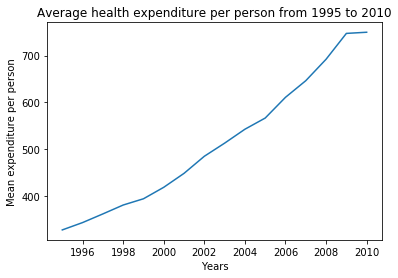

In [36]:
fig = plt.figure()
ax = plt.axes()

x = list(gvt_exp_mean.index)
y = gvt_exp_mean

plt.title("Average health expenditure per person from 1995 to 2010")
ax.set_xlabel('Years')
ax.set_ylabel('Mean expenditure per person')
ax.plot(x,y);

Average expenditure per person seems to be increasing throughout the years

In [37]:
gvt_exp_min = final.groupby("year").goverment_spending.min()
#gvt_exp_min

In [38]:
mvg_avg_min = gvt_exp_min.rolling(window=2).mean() #Moving average will filter the noise
mvg_avg_min.iloc[0]=gvt_exp_min.iloc[0] #so they can have the same shape

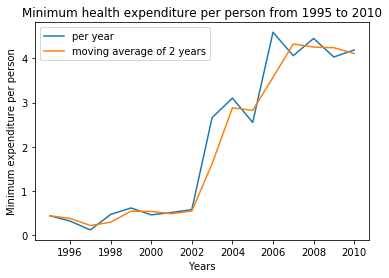

In [39]:
fig = plt.figure()
ax = plt.axes()

x = list(gvt_exp_min.index)
y = gvt_exp_min
z = mvg_avg_min
labels = ("per year","moving average of 2 years")

plt.title("Minimum health expenditure per person from 1995 to 2010")
ax.set_xlabel('Years')
ax.set_ylabel('Minimum expenditure per person')

ax.plot(x,y,label=labels[0]);
ax.plot(x,z,label=labels[1]);
ax.legend();

Moving average help us detect trends more easily since it filters the noice. Furthermore, the minimum expenditure even though it is increasing, it is relatively low compared to the mean

In [40]:
gvt_exp_max = final.groupby("year").goverment_spending.max()
mvg_avg_max = gvt_exp_max.rolling(window=2).mean()
mvg_avg_max.iloc[0]=gvt_exp_max.iloc[0] #so they can have the same shape

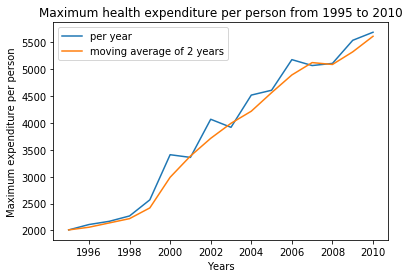

In [41]:
fig = plt.figure()
ax = plt.axes()

x = list(gvt_exp_min.index)
y = gvt_exp_max
z = mvg_avg_max
labels = ("per year","moving average of 2 years")

plt.title("Maximum health expenditure per person from 1995 to 2010")
ax.set_xlabel('Years')
ax.set_ylabel('Maximum expenditure per person')

ax.plot(x,y,label=labels[0]);
ax.plot(x,z,label=labels[1]);
ax.legend();

Maximum expenditure became nearly 3 times more in the last 15 years, following a rising trend

## Health expenditure in Greece

In [42]:
mask = final["country"] == "Greece"

gvt_exp_greece = final[mask].copy()
#gvt_exp_greece

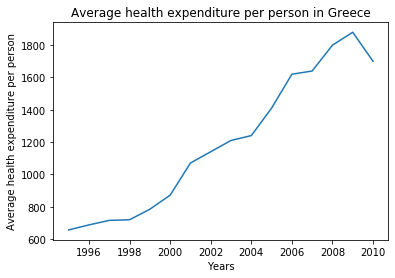

In [43]:
fig = plt.figure()
ax = plt.axes()

x = list(gvt_exp_greece.loc[:,"year"])
y = gvt_exp_greece.loc[:,"goverment_spending"]

plt.title('Average health expenditure per person in Greece')
ax.set_xlabel('Years')
ax.set_ylabel('Average health expenditure per person')

ax.plot(x,y);

Average expenditure in Greece has increased throughout the years, but it started declining after 2009. The reason behind this might have been the economic crisis in Greece.

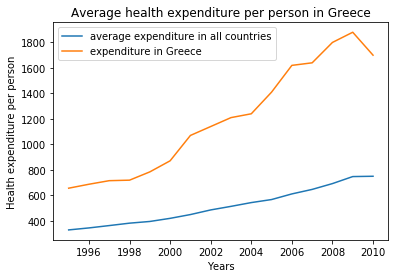

In [44]:
fig = plt.figure()
ax = plt.axes()

x = list(gvt_exp_greece.loc[:,"year"])
y = gvt_exp_greece.loc[:,"goverment_spending"]
#z = mvg_avg_min
v = gvt_exp_mean
labels = ("average expenditure in all countries","minimum expenditure", "expenditure in Greece")


plt.title('Average health expenditure per person in Greece')
ax.set_xlabel('Years')
ax.set_ylabel('Health expenditure per person')

#ax.plot(x,z,label=labels[1]);
ax.plot(x,v,label=labels[0]);
ax.plot(x,y,label=labels[2]);
ax.legend();

The per person health investment in Greece is higher compared to the average in other countries

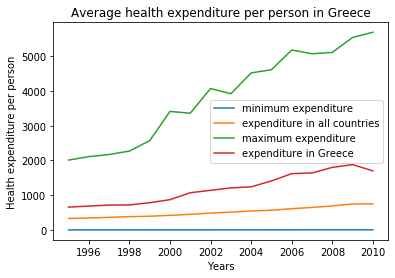

In [45]:
fig = plt.figure()
ax = plt.axes()

x = list(gvt_exp_greece.loc[:,"year"])
y = gvt_exp_greece.loc[:,"goverment_spending"]
z = mvg_avg_min
v = gvt_exp_mean
b = gvt_exp_max
labels = ("expenditure in all countries","minimum expenditure", "expenditure in Greece","maximum expenditure")


plt.title('Average health expenditure per person in Greece')
ax.set_xlabel('Years')
ax.set_ylabel('Health expenditure per person')

ax.plot(x,z,label=labels[1]);
ax.plot(x,v,label=labels[0]);
ax.plot(x,b,label=labels[3]);
ax.plot(x,y,label=labels[2]);
ax.legend();


In [46]:
mean_countries = final.groupby("country").goverment_spending.mean()
min_countries = final.groupby("country").goverment_spending.min()

In [47]:
mean_countries.describe()

count     186.000000
mean      514.692390
std       749.675429
min         2.740500
25%        46.612813
50%       189.884375
75%       548.875000
max      3846.875000
Name: goverment_spending, dtype: float64

In [48]:
mask = mean_countries > (548.875000 +(548.875000-46.612813)) #find outliers
#outliers are the values that are further away than q3+1.5IQR

## Average goverment spending per countries from 1995 to 2010

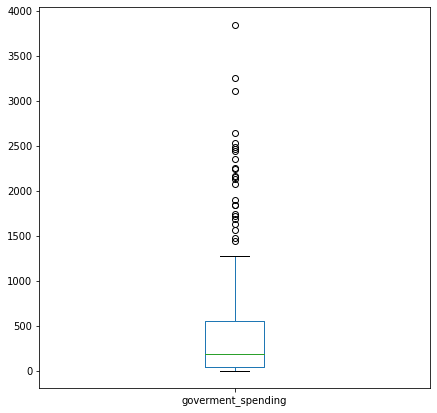

In [49]:
mean_countries.plot(kind="box",figsize=(7,7));

In [50]:
#box plot of outliers ONLY, these values are bigger than q3 +1.5(q3-q1)
548.875000 +(548.875000-46.612813) #any value above this, is considered an outlier

1051.137187

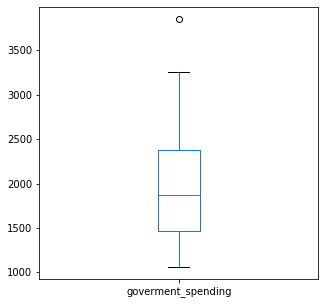

In [51]:
mean_countries[mask].plot(kind="box",figsize=(5,5)); #boxplot of outliers

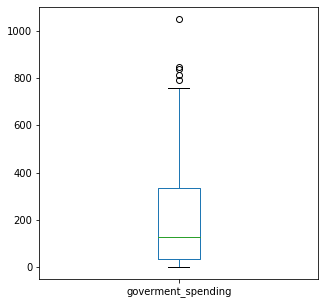

In [52]:
mean_countries[~mask].plot(kind="box",figsize=(5,5)); #box plot without outliers

In [53]:
print(mean_countries[mask].shape[0]) # outliers mean expenditure >1051.137187
print(mean_countries[~mask].shape[0]) # no outliers mean expenditure <1051.137187

32
154


## Minimum goverment spending of each country from 1995 to 2010

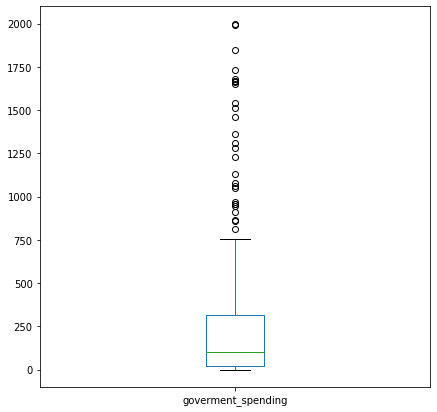

In [54]:
min_countries.plot(kind="box",figsize=(7,7));

In [55]:
min_countries.describe()

count     186.000000
mean      312.033000
std       474.962341
min         0.120000
25%        23.725000
50%       102.350000
75%       316.250000
max      2000.000000
Name: goverment_spending, dtype: float64

In [56]:
mask = min_countries > (316.250000 +(316.250000-23.725000)) #find outliers
#outliers are the values that are further away than q3+1.5IQR

In [57]:
#box plot of outliers ONLY, these values are bigger than q3 +1.5(q3-q1)
316.250000 +(316.250000-23.725000)

608.775

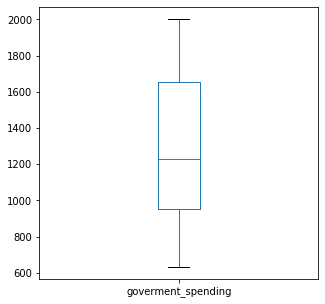

In [58]:
min_countries[mask].plot(kind="box",figsize=(5,5)); #box plot of outliers

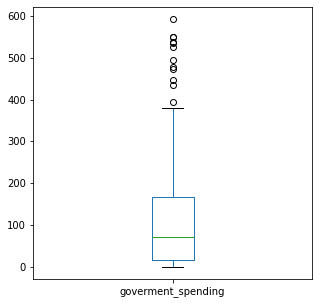

In [59]:
min_countries[~mask].plot(kind="box",figsize=(5,5)); #boxplot without outliers

In [60]:
print(min_countries[mask].shape[0]) # outliers min expenditure >608.775
print(min_countries[~mask].shape[0]) # no outliers min expenditure <608.775

31
155
